In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [33]:
print(torch.cuda.is_available())

False


In [34]:
# Проверяем, доступны ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
# Загрузка DataFrame из файла
with open('dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [36]:
crystal = df['Crystal']
Crystal = []

for i in crystal:
    i = i[1:]
    foo, fooo = i.split(".")
    i = foo
    #print(i)
    Crystal.append(i)

In [37]:
df['Crystal'] = Crystal
df = df.loc[((df['Crystal'] != 'Ag') & (df['Crystal'] != 'Au') & (df['Crystal'] != 'B4C'))]
df = df.reset_index(drop= True)
#segment_df = segment_df.loc[((segment_df['Crystal'] != 'Ag') & (segment_df['Crystal'] != 'Au') & (segment_df['Crystal'] != 'B4C'))]
#segment_df = segment_df.reset_index(drop= True)
df

,Matrix,Crystal,Stats,Pulce duration
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Al,20000000.0,300
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Al2O3_sapphire,20000000.0,300
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Ba,20000000.0,300
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Be,20000000.0,300
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",BeO,20000000.0,300
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",C_diamond,20000000.0,300
6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",C_graphite,20000000.0,300
7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Cr,20000000.0,300
8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Cs,20000000.0,300
9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Cu,20000000.0,300


In [38]:
Crystals = df['Crystal'].unique()

koef = [0.005, 0.006, 0.0005, 0.05, 0.01, 0.0002, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 0.002, 0.02, 0.03, 0.025, 0.015, 0.01, 0.015, 0.01, 0.0001, 0.01, 0.02, 0.015, 0.01, 0.01, 0.005, 0.01, 0.0007, 0.01, 0.007, 0.005, 0.02, 0.001, 0.01, 0.01, 0.0005, 0.015, 0.0025]

k = dict(zip(Crystals, koef))

print(k)

# Добавляем новый столбец с коэффициентами
df['Coefficient'] = df['Crystal'].map(k)

{'Al': 0.005, 'Al2O3_sapphire': 0.006, 'Ba': 0.0005, 'Be': 0.05, 'BeO': 0.01, 'C_diamond': 0.0002, 'C_graphite': 0.0005, 'Cr': 0.0005, 'Cs': 0.0005, 'Cu': 0.0005, 'Cu2MnAl': 0.005, 'Fe': 0.002, 'Ga': 0.02, 'Gd': 0.03, 'Ge': 0.025, 'H2O_ice_1h': 0.015, 'He4_hcp': 0.01, 'Hg': 0.015, 'I2': 0.01, 'K': 0.0001, 'Li': 0.01, 'LiF': 0.02, 'Mo': 0.015, 'Na2Ca3Al2F14': 0.01, 'Nb': 0.01, 'Ni': 0.005, 'Pb': 0.01, 'Pt': 0.0007, 'Rb': 0.01, 'Si': 0.007, 'Ti': 0.005, 'Tl': 0.02, 'UO2': 0.001, 'Zn': 0.01, 'Y2O3': 0.01}


In [39]:
def generate_mask_background(data, k_background):
    # Нормализуем данные
    data = data / np.max(data)

    # Порог для фона
    threshold_background = k_background * np.max(data)

    # Создаем маску: фон (0) и всё остальное (2)
    mask = np.where(data > threshold_background, 2, 0)
    
    return mask

def add_beam_mask(mask):
    # Примерные координаты углов трапеции
    x1, y1 = 238, 15   # Верхний левый
    x2, y2 = 243, 15   # Верхний правый
    x3, y3 = 224, 249  # Нижний левый
    x4, y4 = 256, 249  # Нижний правый

    # Создадим маску для трапеции
    for y in range(y1, y3+1):
        left_x = int(x1 + (x3 - x1) * (y - y1) / (y3 - y1))
        right_x = int(x2 + (x4 - x2) * (y - y2) / (y4 - y2))
        mask[y, left_x:right_x] = 1  # Используем y как индекс строки, а x как индекс столбца

    return mask

In [40]:
df_seg = pd.DataFrame(columns=['Mask'])

masks = []

for i in range(len(df['Matrix'])):
    k_background = df['Coefficient'][i]
    matrix = df['Matrix'][i]
    mask = generate_mask_background(matrix, k_background)
    mask = add_beam_mask(mask)
    masks.append(mask)

df_seg['Mask'] = masks

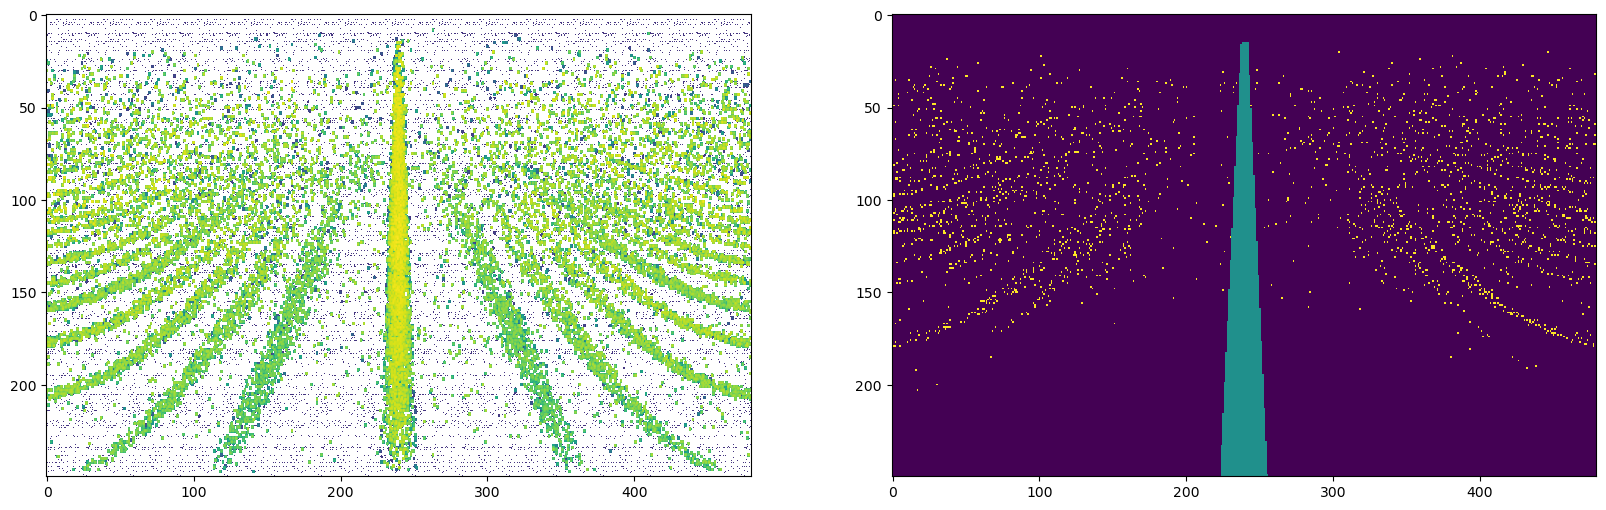

In [41]:
# Создаем фигуру и оси
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Первый график
ax1.imshow(df['Matrix'][23], cmap='viridis', aspect='auto', norm='log')

# Первый график
ax2.imshow(df_seg['Mask'][23], cmap='viridis', aspect='auto', interpolation='none')

plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(['Crystal', 'Stats', 'Pulce duration', 'Coefficient'], axis=1)

# Шаг 1: Преобразование строковых меток классов в числовые метки
label_encoder = LabelEncoder()

segmenadion_masks = df_seg

y = df['Crystal']

y_encoded = label_encoder.fit_transform(y)

Diff_train, Diff_test, Segmenation_Diff_train, Segmenation_Diff_test, y_train, y_test = train_test_split(X, segmenadion_masks, y_encoded, test_size=0.1, random_state=42)

In [43]:
# Преобразование матриц в numpy массив перед преобразованием в тензоры
Diff_train_matrices = np.array(Diff_train['Matrix'].tolist())
Diff_test_matrices = np.array(Diff_test['Matrix'].tolist())

Segmenation_Diff_train_matrices = np.array(Segmenation_Diff_train['Mask'].tolist())
Segmenation_Diff_test_matrices = np.array(Segmenation_Diff_test['Mask'].tolist())

# Преобразование данных в тензоры PyTorch
Diff_train_tensor = torch.FloatTensor(Diff_train_matrices)
Diff_train_tensor = Diff_train_tensor.unsqueeze(1)
Segmentation_Diff_train_tensor = torch.FloatTensor(Segmenation_Diff_train_matrices)
#Segmentation_Diff_train_tensor = Segmentation_Diff_train_tensor.unsqueeze(1)
y_train_tensor = torch.LongTensor(y_train)  # Используем LongTensor для целевых меток

Diff_test_tensor = torch.FloatTensor(Diff_test_matrices)
Diff_test_tensor = Diff_test_tensor.unsqueeze(1)
Segmentation_Diff_test_tensor = torch.FloatTensor(Segmenation_Diff_test_matrices)
#Segmentation_Diff_test_tensor = Segmentation_Diff_test_tensor.unsqueeze(1)
y_test_tensor = torch.LongTensor(y_test)

In [44]:
Diff_train_tensor.size()

torch.Size([31, 1, 250, 480])

In [45]:
Segmentation_Diff_train_tensor.size()

torch.Size([31, 250, 480])

In [46]:
import torch.nn as nn
import torch.nn.functional as F

# Пример модели U-Net
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder1 = self.conv_block(1, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)

        self.decoder1 = self.up_conv(512, 256)
        self.decoder2 = self.up_conv(256, 128)
        self.decoder3 = self.up_conv(128, 64)
        self.decoder4 = nn.Conv2d(64, 3, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def up_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            self.conv_block(out_channels, out_channels)
        )

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Decoder
        d1 = self.decoder1(F.interpolate(e4, scale_factor=1, mode='bilinear', align_corners=True))
        d2 = self.decoder2(F.interpolate(d1 + e3, scale_factor=1, mode='bilinear', align_corners=True))
        d2 = F.pad(d2, (0, 0, 1, 0))  # (left, right, top, bottom)
        d3 = self.decoder3(F.interpolate(d2 + e2, scale_factor=1, mode='bilinear', align_corners=True))
        d4 = self.decoder4(F.interpolate(d3 + e1, scale_factor=1, mode='bilinear', align_corners=True))

        #return F.softmax(d4, dim=1)  # Применяем softmax для многоклассовой классификации
        return d4

In [47]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Создание набора данных
train_dataset = TensorDataset(Diff_train_tensor, Segmentation_Diff_train_tensor, y_train_tensor)

test_dataset = TensorDataset(Diff_test_tensor, Segmentation_Diff_test_tensor, y_test_tensor)

# Создание DataLoader для каждой выборки
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

In [48]:
# Пример настройки гиперпараметров и запуска обучения
model = UNet().to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.99))

#optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [49]:
epochs = 10
history = []
history_test = []
num_bach = 0
baches = []

In [50]:
for i in range(epochs):

  for x_batch, y_batch, class_bach in train_loader:

    num_bach+=1
    # 1. # загружаем батч данных (вытянутый в линию)
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    # 2. вычисляем скор с помощью прямого распространения ( .forward or .__call__ )
    logits = model(x_batch)
    #logits = logits.squeeze(1)

    y_batch = y_batch.long()

    # 3. вычислеяем - функцию потерь (loss)
    loss = criterion(logits, y_batch)
    
    history.append(loss.item())

    # 4. вычисляем градиенты
    optimizer.zero_grad()
    loss.backward()

    # 5. шаг градиентного спуска
    optimizer.step()

  with torch.no_grad():
    for inputs, targets, class_bach in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)  # Получаем логиты от модели

        #outputs = outputs.squeeze(1)
        targets = targets.long()

        test_loss = criterion(outputs, targets)
        history_test.append(test_loss.item())
        baches.append(num_bach)

  print(f'Epoch {i+1}, Loss: {history[-1], 2}, Loss test: {history_test[-1], 2}')

Epoch 1, Loss: (1.8016324043273926, 2), Loss test: (2.0992541313171387, 2)
Epoch 2, Loss: (1.0747703313827515, 2), Loss test: (1.7532793283462524, 2)
Epoch 3, Loss: (1.092733383178711, 2), Loss test: (1.378036379814148, 2)
Epoch 4, Loss: (0.7896084189414978, 2), Loss test: (1.1620080471038818, 2)
Epoch 5, Loss: (0.7433900833129883, 2), Loss test: (1.0484665632247925, 2)
Epoch 6, Loss: (0.7417546510696411, 2), Loss test: (1.0018588304519653, 2)
Epoch 7, Loss: (0.6153789758682251, 2), Loss test: (0.9179885983467102, 2)
Epoch 8, Loss: (0.7084727883338928, 2), Loss test: (0.8226701617240906, 2)
Epoch 9, Loss: (0.4359022378921509, 2), Loss test: (0.7383514046669006, 2)
Epoch 10, Loss: (0.37442129850387573, 2), Loss test: (0.5968273282051086, 2)


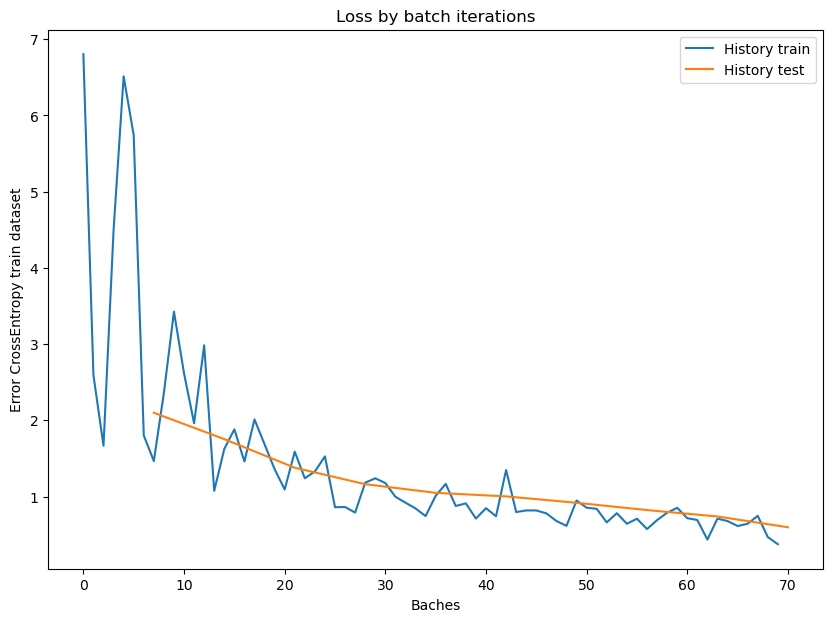

In [51]:
plt.figure(figsize=(10, 7))
plt.plot(history, label = 'History train')
plt.plot(baches, history_test, label = 'History test')
plt.title('Loss by batch iterations')
plt.ylabel('Error CrossEntropy train dataset')
plt.xlabel('Baches')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.show()

In [52]:
maxStats = max(df['Stats'].unique())
minI = max(df['Pulce duration'].unique())

df_test = df.loc[((df['Stats'] == maxStats) & (df['Pulce duration'] == minI))]
df_test = df_test.reset_index(drop= True)

#segment_df_test = segment_df.loc[((segment_df['Stats'] == maxStats) & (segment_df['Pulce duration'] == minI))]
#segment_df_test = segment_df_test.reset_index(drop= True)

# Преобразование матриц в numpy массив перед преобразованием в тензоры
df_test_matrices = np.array(df_test['Matrix'].tolist())
#Segmenation_df_test_matrices = np.array(segment_df_test['Segmendation Diff'].tolist())

# Преобразование данных в тензоры PyTorch
df_test_tensor = torch.FloatTensor(df_test_matrices)
df_test_tensor = df_test_tensor.unsqueeze(1)

#Segmenation_df_test_tensor = torch.FloatTensor(Segmenation_df_test_matrices)
#Segmenation_df_test_tensor = Segmenation_df_test_tensor.unsqueeze(1)

df_test_tensor = df_test_tensor.to(device)
#Segmenation_df_test_tensor.size()
df_test_tensor.size()

df_test_tensor = df_test_tensor.to(device)

In [53]:
# Получаем предсказания модели (логиты)
output = model(df_test_tensor)  # output имеет размер [batch_size, 3, height, width]

# Применяем argmax, чтобы получить финальные предсказания классов (0, 1, 2)
# Пример для одного изображения в батче (нужно для визуализации одного примера)
for i in range(len(df_test)):
    predicted_mask = torch.argmax(F.softmax(output, dim=1), dim=1)[i]  # Размер [height, width]

    # Преобразуем в numpy для визуализации
    predicted_mask = predicted_mask.cpu().numpy()  # Переносим на CPU и в numpy

    # Визуализируем итоговую маску
    plt.figure(figsize=(10, 10))
    plt.imshow(predicted_mask, cmap='viridis', aspect='auto', interpolation='none')
    plt.title("Predicted Mask")
    plt.axis('off')
    plt.show()

[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 